### Author: fmozo
### Content:
- Training on moving Mnist dataset. Uses the old class. probably needs some changes to work.


In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from torch.utils.data import DataLoader
from src.data import MovingMnistDataset
import matplotlib.pyplot as plt
import torch.optim as optim
from tqdm import tqdm
import time
import pandas as pd

from src.dl_models.unet import UNet 

In [21]:
def plot_seq(indxs, data):
    fig = plt.figure(figsize=(8, 8))
    columns = 20
    rows = 1
    for i in range(1, columns*rows +1):
        img = data[i-1, :, :]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()    

In [8]:
path = 'data/moving_mnist/mm_train/'
csv = 'data/moving_mnist/toy_moving_mnist.csv'
mnist_ds = MovingMnistDataset(path=path, csv=csv, shuffle=True)
print(len(mnist_ds))
mnist_dl = DataLoader(mnist_ds, batch_size=50)

for id, (curr_seq, idxs, inputs, target) in enumerate(mnist_dl):
    print(inputs.size())
    print(target.size())
    print(idxs)
    print()
    if id==1:
        break

5100
torch.Size([50, 3, 64, 64])
torch.Size([50, 1, 64, 64])
tensor([[ 0,  1,  2,  3],
        [ 1,  2,  3,  4],
        [ 2,  3,  4,  5],
        [ 3,  4,  5,  6],
        [ 4,  5,  6,  7],
        [ 5,  6,  7,  8],
        [ 6,  7,  8,  9],
        [ 7,  8,  9, 10],
        [ 8,  9, 10, 11],
        [ 9, 10, 11, 12],
        [10, 11, 12, 13],
        [11, 12, 13, 14],
        [12, 13, 14, 15],
        [13, 14, 15, 16],
        [14, 15, 16, 17],
        [15, 16, 17, 18],
        [16, 17, 18, 19],
        [ 0,  1,  2,  3],
        [ 1,  2,  3,  4],
        [ 2,  3,  4,  5],
        [ 3,  4,  5,  6],
        [ 4,  5,  6,  7],
        [ 5,  6,  7,  8],
        [ 6,  7,  8,  9],
        [ 7,  8,  9, 10],
        [ 8,  9, 10, 11],
        [ 9, 10, 11, 12],
        [10, 11, 12, 13],
        [11, 12, 13, 14],
        [12, 13, 14, 15],
        [13, 14, 15, 16],
        [14, 15, 16, 17],
        [15, 16, 17, 18],
        [16, 17, 18, 19],
        [ 0,  1,  2,  3],
        [ 1,  2,  3,  4],
   

# This section i create a toy

In [19]:
toy_mnist = pd.read_csv('data/moving_mnist/toy_moving_mnist.csv', header=None)

(len(toy_mnist.iloc[0]) - 3) * (toy_mnist.shape[0])

5100

# Next section is training on the data

### First (simple) version for training on moving mnist with batch sizes >= 1.  

In [9]:
# Setup
path = 'data/moving_mnist/mm_train/'
csv = 'data/moving_mnist/toy_moving_mnist.csv'

# Set device
USE_CUDA = True
device = torch.device('cuda' if torch.cuda.is_available()
                      and USE_CUDA else 'cpu')
print(f'Using {device}')

# Hyperparameters
n_channels=3
n_classes=1
lr=0.001

# Load data
mnist_dataset = MovingMnistDataset(path=path, csv=csv, shuffle=True)
loader = DataLoader(mnist_dataset, batch_size=5)

# Initialize network
model = UNet(n_channels=n_channels, n_classes=n_classes, bilinear=True).to(device)
model.train()

# Loss and optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

# Needed variables
LOSS_HISTORY = []
EPOCHS = [1 ,2]
LOADER_LEN = len(loader)
print(LOADER_LEN)

time.sleep(1)
# Training
for epoch in EPOCHS:
    with tqdm(loader, desc=f'Epoch {epoch}/{len(EPOCHS)}', unit='batches') as pbar:
        for (curr_seq, idxs, inputs, targets) in pbar:
 
            inputs = inputs.to(device=device)
            targets = targets.to(device=device)

            scores = model(inputs)

            loss = criterion(scores, targets)

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()

            pbar.set_postfix({'Loss': loss.item()})

            LOSS_HISTORY.append(loss)
    



Using cuda
1020
Epoch 1/2:  57%|█████▋    | 585/1020 [00:50<00:37, 11.56batches/s, Loss=0.0142]


KeyboardInterrupt: 

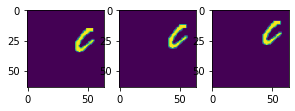

NameError: name 'target' is not defined

In [19]:
model.eval()

mnist_dataset = MovingMnistDataset(path=path, csv=csv, shuffle=True)
loader = DataLoader(mnist_dataset, batch_size=1)

# forward pass on training data to test how this works
(curr_seq, idxs, inputs, targets) = iter(loader).next()

inputs = inputs.to(device=device)

targets = targets.unsqueeze(dim=1) # when reload notebook, remove this line (implemented in class)
targets = targets.to(device=device)

scores = model(inputs)

fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 1
for n in range(3):
    fig.add_subplot(rows, columns, n+1)
    plt.imshow(inputs[:, n, :, :].squeeze().cpu().numpy())
    
plt.show()

# fig = plt.figure(figsize=(8, 8))
# columns = 5
# rows = 1
# for i in range(1, columns*rows -1):
#     img = input[:, i-1, :, :].squeeze().cpu().numpy()
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(img)

# fig.add_subplot(rows, columns, 4)
# plt.imshow(target.squeeze().cpu().detach().numpy())


# fig.add_subplot(rows, columns, 5)
# plt.imshow(scores.squeeze().cpu().detach().numpy())
# plt.show()    


# Print the difference
plt.figure(figsize=(8, 8))

diff = target.squeeze().cpu().detach().numpy() - scores.squeeze().cpu().detach().numpy()
plt.imshow(diff)
plt.show()


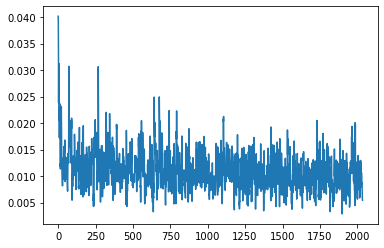

In [10]:
plt.figure()
plt.plot(LOSS_HISTORY[4:])

<Figure size 432x288 with 0 Axes>

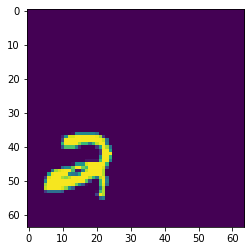

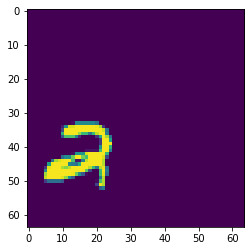

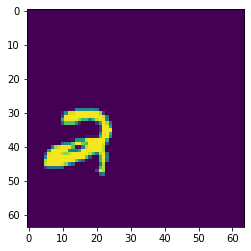

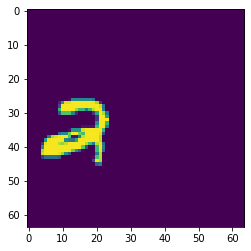

In [47]:
# IMGS MAX VALUES

path = 'data/moving_mnist/mm_train/'
csv = 'data/moving_mnist/moving_mnist.csv'
mnist_ds = MovingMnistDataset(path=path, csv=csv, shuffle=True)

mnist_dl = DataLoader(mnist_ds, batch_size=1)

plt.figure()
for id, (curr_seq, idxs, inputs, target) in enumerate(mnist_dl):
    fig = plt.figure(figsize=(8, 8))
    columns = 4
    rows = 1
    for n in range(3):
        fig.add_subplot(rows, columns, n+1)
        plt.imshow(inputs[:, n, :, :].squeeze().cpu().numpy())

    plt.show()
    break

